In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['spam'] = df['Category'].apply(lambda x: 1 if x== 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


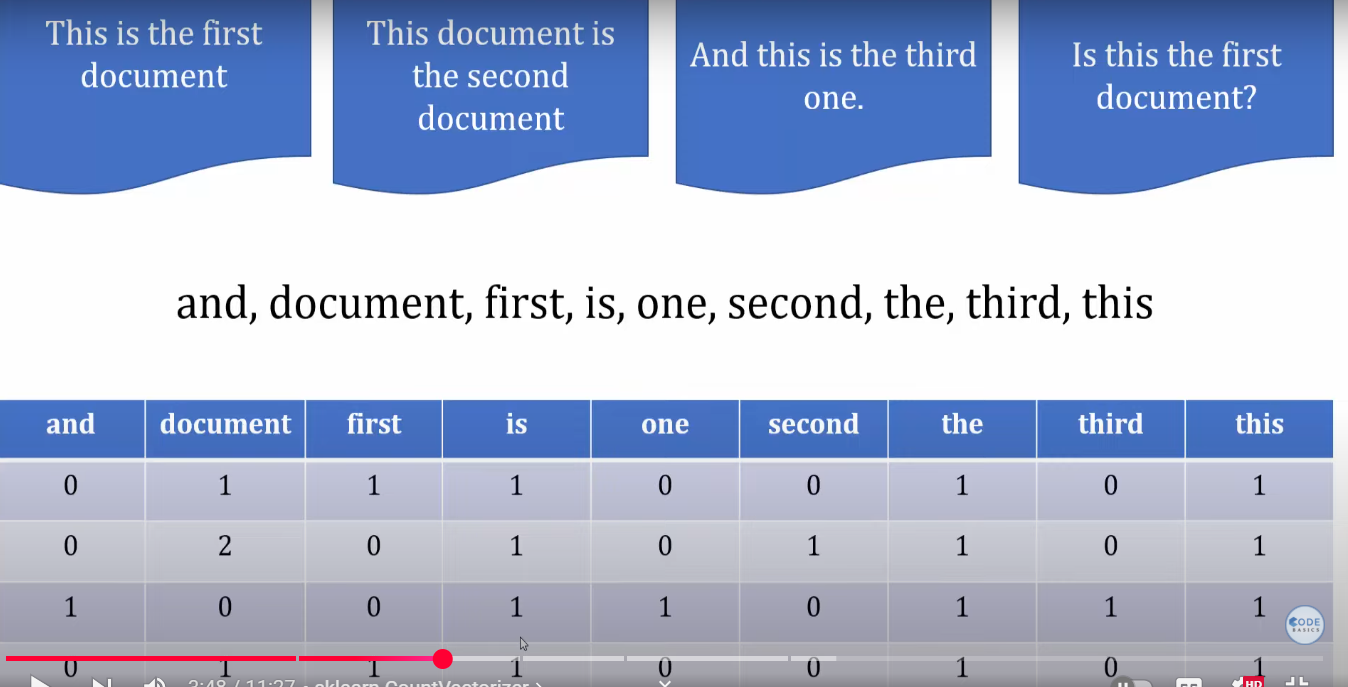

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam , test_size = 0.25)

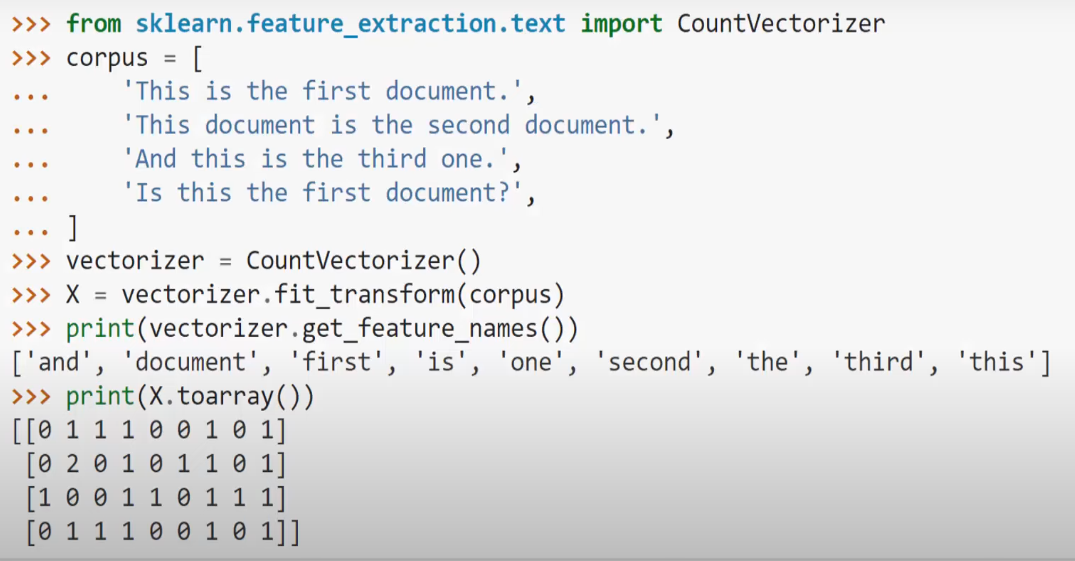

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

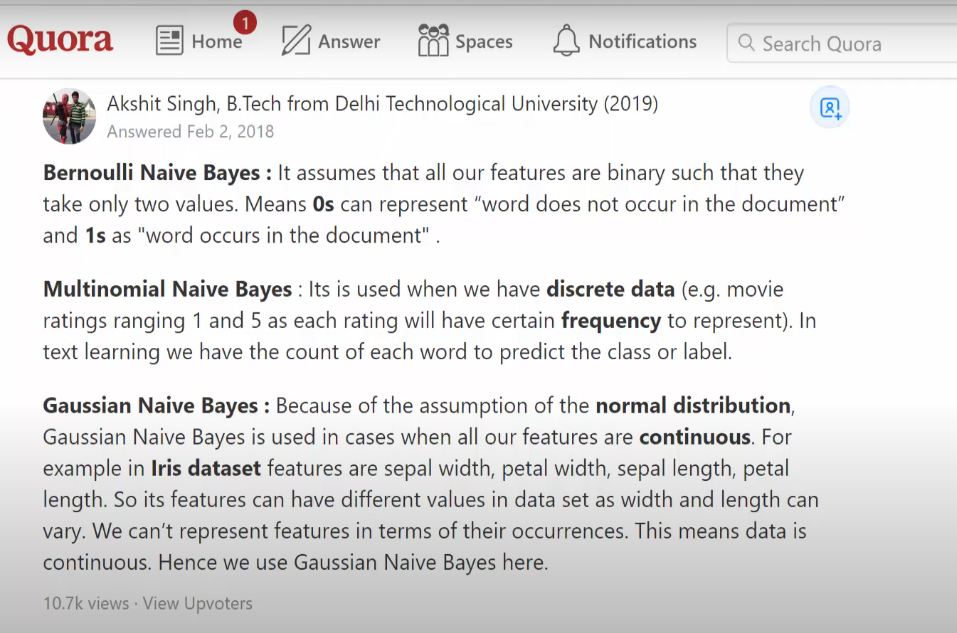

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count , y_train)
# x_train_count basicly array([[0, 0, 0, ..., 0, 0, 0],[0, 0, 0, ..., 0, 0, 0],[0, 0, 0, ..., 0, 0, 0],
# this values

MultinomialNB()

In [15]:
email = [
    'hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Are you ill? i am vary curius about your helth.',
    'Congratulations bro you are geting 10000 rupee prise.',
    'Congratulations bro you are geting 10000 (win) prise.'
]
email_count = v.transform(email)
model.predict(email_count)

array([0, 1, 0, 0, 1])

In [21]:
x_test_count  = v.transform(x_test)
model.score(x_test_count , y_test)

0.9856424982053122

In [17]:
# this is a pipline methord
# another way of doing
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [18]:
clf.fit(x_train , y_train) # no need to writex_train_count

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [19]:
clf.score(x_test, y_test)

0.9856424982053122

In [20]:
clf.predict(email)

array([0, 1, 0, 0, 1])

Text(95.72222222222221, 0.5, 'Truth')

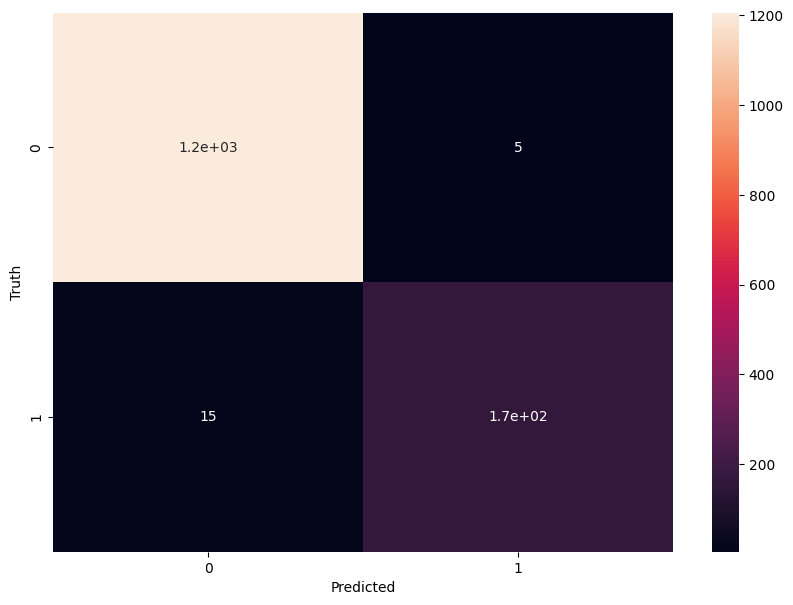

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')